<a href="https://colab.research.google.com/github/Thegr8leke/HTMLTemplate/blob/master/Crime_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Analysis: Effect of big data in criminal analysis**

1. this report aims to discuss the effects of big data solutions in criminal analysis using historical data provided by the UK government of crimes commited in different financial years.
2. the report covers the usage of different big data technologies such as pandas, spark, sparksql,hive, mapreduce, and machine learning models for outlier detection, correlation analysis, and prediction

#MY SETUP

In [ ]:
!pip install -q findspark #add a startup file to the current IPython profile so that the environment vaiables will be properly set and pyspark will be imported upon IPython startup.
!pip install pyspark[sql] #pandas API on Spark pip install pyspark[pandas_on_spark] plotly
!pip install odfpy #Odfpy is a library to read and write OpenDocument v. 1.2 files.
!pip install pandas scikit-learn #scikit-learn is a Python module for machine learning built on top of SciPy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=63e6535ed7749ec195b73ddd4985ff1fec874c78f81196a0b4f100f3b1db1527
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 717.0/717.0 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for odfpy: filename=odfpy-1.4.1-py2.py3-none-any.whl size=160673 sha256=2e5fc5acab3f29d18a5703801463aaca23a4fe2e9810fb9658ff30bb8376f3be
  Stored in directory: /root/.cache/pip/wheels/c8/2e/95/90d94fe33903786937f3b8c33dd88807f792359c6424b40469
Successfully built odfpy


## INSTALL JAVA HADOOP

1.   Java 8
2.   Apache Spark with hadoop

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null #installing Java 8 apk
!wget -q http://archive.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz #install hadoop datacluster
!tar xf spark-3.1.1-bin-hadoop3.2.tgz #hadoop data cluster

## Install Map Reduce Libraries

In [ ]:
!pip install mrjob #install the library for Map Reduce
!pip install pathlib
!pip install PyYAML

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.6/439.6 kB 6.7 MB/s eta 0:00:00


## Import Necessary Libraries

**Importing Panda and numerical constants**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from pyspark.sql import SparkSession

Create a Spark session
spark = SparkSession.builder \
    .appName("YourAppName") \  # Replace "YourAppName" with a suitable name
    .getOrCreate()

Now you can use 'spark' to perform Spark operations


**Import Findspark and its session**

In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").appName("DAT7015").getOrCreate()
spark.conf.set("spark.sql.repl.eagerEval.enabled", True) # Property used to format output tables better
spark

## Set Environment Variables

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

In [ ]:
!ls

drive  sample_data  spark-3.1.1-bin-hadoop3.2  spark-3.1.1-bin-hadoop3.2.tgz


In [ ]:
# Enabling Hive to use in Spark
spark = SparkSession.builder \
      .master("local[1]") \
      .appName("Hive") \
      .config("spark.sql.warehouse.dir", "<path>/sparkhivewarehouse") \
      .enableHiveSupport() \
      .getOrCreate()

In [ ]:
#import org.apache.spark.sql.hive.HiveContext;

# Using Pandas

 **Read the ODS file dataset**

## Dataset 1: Criminal database

#### Load the dataset


In [ ]:
 dataset = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Assignment 2/Dataset.ods", sheet_name = None ) #read the dataset

#### Highlight the sheets in the dataset

In [ ]:
dataset.keys() #highlighting the worksheets in the dataset

dict_keys(['Cover_sheet', 'Notes_', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2019-20', '2020-21', '2021-22', '2022-23', '2023-24'])

In [ ]:
dataset['2012-13'].head(5) #code to check first 5 rows in column 2012-13

,Financial Year,Financial Quarter,Force Name,Offence Description,Offence Group,Offence Subgroup,Offence Code,Number of Offences
0,2012/13,1,Action Fraud,Fraud offences recorded by Action Fraud,Fraud offences,Fraud: Action Fraud,AF,20323
1,2012/13,1,Avon and Somerset,Abandoning child under two years (outcomes only),Violence against the person,Violence without injury,12,0
2,2012/13,1,Avon and Somerset,Absconding from lawful custody,Miscellaneous crimes against society,Miscellaneous crimes against society,80,1
3,2012/13,1,Avon and Somerset,Abuse of children through prostitution and por...,Sexual offences,Other sexual offences,71,0
4,2012/13,1,Avon and Somerset,Abuse of position of trust of a sexual nature,Sexual offences,Other sexual offences,73,3


In [ ]:
dataset['2014-15'].shape #code to check details of the column

(21132, 8)

In [ ]:
dataset['2015-16'].shape

(21308, 8)

In [ ]:
dataset['2021-22'].shape

(23772, 8)

In [ ]:
dataset['2022-23'].shape

(23772, 8)

### Make a copy

In [ ]:
dataset1 = dataset.copy()

#### Remove worksheets from the workbook

In [ ]:
del dataset1['Cover_sheet'] #deleting the worksheet "Coversheet"

In [ ]:
dataset1.keys() #code to check no of worksheets in dataset

dict_keys(['Notes_', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2019-20', '2020-21', '2021-22', '2022-23', '2023-24'])

SheetD represents worksheets we are not using

In [ ]:
sheetD = ['Notes_', '2012-13', '2013-14', '2016-17', '2017-18', '2018-19', '2019-20', '2020-21', '2023-24'] #deleting worksheet 'Notes'

In [ ]:
for sheet_name in sheetD:
    if sheet_name in dataset1:
        del dataset1[sheet_name]

In [ ]:
dataset1.keys()

dict_keys(['2014-15', '2015-16', '2021-22', '2022-23'])

#### Merging the worksheets
we attempt to merge all necessary worksheets in this section

In [ ]:
Dataset1 = pd.concat(dataset1, ignore_index=True) #new dataset without Notes and Coversheet

In [ ]:
Dataset1.keys()

Index(['Financial Year', 'Financial Quarter', 'Force Name',
       'Offence Description', 'Offence Group', 'Offence Subgroup',
       'Offence Code', 'Number of Offences'],
      dtype='object')

In [ ]:
Dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89984 entries, 0 to 89983
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Financial Year       89984 non-null  object
 1   Financial Quarter    89984 non-null  int64 
 2   Force Name           89984 non-null  object
 3   Offence Description  89984 non-null  object
 4   Offence Group        89984 non-null  object
 5   Offence Subgroup     89984 non-null  object
 6   Offence Code         89984 non-null  object
 7   Number of Offences   89984 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 5.5+ MB


In [ ]:
Dataset1.shape

(89984, 8)

### Rename the Column

In [ ]:
Dataset1.columns #to show the columns in the worksheet

Index(['Financial Year', 'Financial Quarter', 'Force Name',
       'Offence Description', 'Offence Group', 'Offence Subgroup',
       'Offence Code', 'Number of Offences'],
      dtype='object')

In [ ]:
Dataset1.rename(columns={
    'Financial Year': 'Fyear','Financial Quarter': 'FQuarter', 'Force Name': 'ForceName', 'Offence Description': 'OffDesc',
    'Offence Group': 'OffGroup', 'Offence Subgroup': 'OffSubgroup', 'Offence Code': 'OffCode', 'Number of Offences': 'NoOff'
    }, inplace=True)

Dataset1.columns

Index(['Fyear', 'FQuarter', 'ForceName', 'OffDesc', 'OffGroup', 'OffSubgroup',
       'OffCode', 'NoOff'],
      dtype='object')

### Handling duplicates


In [ ]:
Dataset1 = Dataset1.drop_duplicates(Dataset1) #deleting the duplicates found in the worksheet
Dataset1.shape

(89984, 8)

### Detect Missing Values

In [ ]:
Dataset1.isnull() #checking for null values

,Fyear,FQuarter,ForceName,OffDesc,OffGroup,OffSubgroup,OffCode,NoOff
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
89979,False,False,False,False,False,False,False,False
89980,False,False,False,False,False,False,False,False
89981,False,False,False,False,False,False,False,False
89982,False,False,False,False,False,False,False,False


In [ ]:
Dataset1.isnull().sum() #checking for sum of null values in each column

Fyear          0
FQuarter       0
ForceName      0
OffDesc        0
OffGroup       0
OffSubgroup    0
OffCode        0
NoOff          0
dtype: int64

In [ ]:
Dataset1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89984 entries, 0 to 89983
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Fyear        89984 non-null  object
 1   FQuarter     89984 non-null  int64 
 2   ForceName    89984 non-null  object
 3   OffDesc      89984 non-null  object
 4   OffGroup     89984 non-null  object
 5   OffSubgroup  89984 non-null  object
 6   OffCode      89984 non-null  object
 7   NoOff        89984 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 6.2+ MB


## **Dataset 2 - Offence Codes**

### Load the dataset

In [ ]:
dataset2 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Assignment 2/Dataset OC.ods") #read the dataset
dataset2.head(5)

,Offence Code,Offence description,Old PRC offence group,Old offence sub-group,New ONS offence group,New ONS sub-offence group
0,1,Murder,Violence against the person,Violence against the person - with injury,Violence against the person,Homicide
1,1/4.1/4.2,Homicide,Violence against the person,Violence against the person - with injury,Violence against the person,Homicide
2,1/4.1/4.2/4.10,Homicide,Violence against the person,Violence against the person - with injury,Violence against the person,Homicide
3,104,Assault without injury on a constable,Violence against the person,Violence against the person - without injury,Violence against the person,Violence without injury
4,105A,Assault without injury,Violence against the person,Violence against the person - without injury,Violence against the person,Violence without injury


In [ ]:
dataset2.shape

(198, 6)

### Rename the *Columns*

In [ ]:
dataset2.columns

Index(['Offence Code', 'Offence description', 'Old PRC offence group',
       'Old offence sub-group', 'New ONS offence group',
       'New ONS sub-offence group'],
      dtype='object')

In [ ]:
dataset2.rename(columns={
    'Offence Code': 'Offencecode',
    'Offence description': 'Offdescription',
    'Old PRC offence group': 'oldOffGroup',
    'Old offence sub-group': 'oldOffsubGroup',
    'New ONS offence group': 'newOffGroup',
    'New ONS sub-offence group': 'noSGroup'
    }, inplace=True)

dataset2.columns

Index(['Offencecode', 'Offdescription', 'oldOffGroup', 'oldOffsubGroup',
       'newOffGroup', 'noSGroup'],
      dtype='object')

In [ ]:
dataset2.tail(5)

,Offencecode,Offdescription,oldOffGroup,oldOffsubGroup,newOffGroup,noSGroup
193,99,Other notifiable offences,Other miscellaneous offences,NaN,Miscellaneous crimes against society,Miscellaneous crimes against society
194,9A,"Public fear, alarm or distress",Violence against the person,Violence against the person - without injury,Public order offences,Public order offences
195,9B,Racially or religiously aggravated public fear...,Violence against the person,Violence against the person - without injury,Public order offences,Public order offences
196,NaN,NaN,NaN,NaN,NaN,NaN
197,* These offences were introduced after 31 Marc...,NaN,NaN,NaN,NaN,NaN


### Create a copy of dataset

In [ ]:
dataset2.copy() #making a copy of the worksheet df before starting the data cleaning
dataset2.head (5) #preview of new worksheet

,Offencecode,Offdescription,oldOffGroup,oldOffsubGroup,newOffGroup,noSGroup
0,1,Murder,Violence against the person,Violence against the person - with injury,Violence against the person,Homicide
1,1/4.1/4.2,Homicide,Violence against the person,Violence against the person - with injury,Violence against the person,Homicide
2,1/4.1/4.2/4.10,Homicide,Violence against the person,Violence against the person - with injury,Violence against the person,Homicide
3,104,Assault without injury on a constable,Violence against the person,Violence against the person - without injury,Violence against the person,Violence without injury
4,105A,Assault without injury,Violence against the person,Violence against the person - without injury,Violence against the person,Violence without injury


### Drop rows

In [ ]:
dataset2.tail(5)

,Offencecode,Offdescription,oldOffGroup,oldOffsubGroup,newOffGroup,noSGroup
193,99,Other notifiable offences,Other miscellaneous offences,NaN,Miscellaneous crimes against society,Miscellaneous crimes against society
194,9A,"Public fear, alarm or distress",Violence against the person,Violence against the person - without injury,Public order offences,Public order offences
195,9B,Racially or religiously aggravated public fear...,Violence against the person,Violence against the person - without injury,Public order offences,Public order offences
196,NaN,NaN,NaN,NaN,NaN,NaN
197,* These offences were introduced after 31 Marc...,NaN,NaN,NaN,NaN,NaN


In [ ]:
dataset2.drop(dataset2.index[-2:], inplace=True) #delete last two rows of the dataset

In [ ]:
dataset2.shape #dataset description

(196, 6)

### Handling Duplicates

In [ ]:
duplicated_rows = dataset2[dataset2['Offencecode'].duplicated(keep=False)]

In [ ]:
duplicated_rows #list of all duplicate rows

,Offencecode,Offdescription,oldOffGroup,oldOffsubGroup,newOffGroup,noSGroup
154,88A,Sexual grooming,Sexual offences,Other sexual offences,Sexual offences,Other sexual offences
155,88A,Sexual grooming,Sexual offences,Other sexual offences,Sexual offences,Other sexual offences
156,88B,Other miscellaneous sexual offences,Sexual offences,Other sexual offences,Sexual offences,Other sexual offences
157,88B,Other miscellaneous sexual offences,Sexual offences,Other sexual offences,Sexual offences,Other sexual offences
158,88C,Other miscellaneous sexual offences,Sexual offences,Other sexual offences,Sexual offences,Other sexual offences
159,88C,Other miscellaneous sexual offences,Sexual offences,Other sexual offences,Sexual offences,Other sexual offences
160,88D,Unnatural sexual offences,Sexual offences,Other sexual offences,Sexual offences,Other sexual offences
161,88D,Unnatural sexual offences,Sexual offences,Other sexual offences,Sexual offences,Other sexual offences
169,8H,Racially or religiously aggravated inflicting ...,Violence against the person,Violence against the person - with injury,Violence against the person,Violence with injury
170,8H,Racially or religiously aggravated inflicting ...,Violence against the person,Violence against the person - with injury,Violence against the person,Violence with injury


In [ ]:
distinct_values = dataset2['Offencecode'].unique() #code to check for distinct rows in offcode

In [ ]:
Dataset2 = dataset2.drop_duplicates(dataset2) # Drop duplicates deletes the duplicates after the first occcurence.
Dataset2.shape

(186, 6)

### Detecting Missing values

In [ ]:
Dataset2.isnull() #code to check for null values

,Offencecode,Offdescription,oldOffGroup,oldOffsubGroup,newOffGroup,noSGroup
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
191,False,False,False,True,False,False
192,False,False,True,True,False,False
193,False,False,False,True,False,False
194,False,False,False,False,False,False


In [ ]:
Dataset2.isnull().sum() #code to give a sum of null values in each column

Offencecode        0
Offdescription     0
oldOffGroup        5
oldOffsubGroup    90
newOffGroup        0
noSGroup           0
dtype: int64

### Handling Missing Values

In [ ]:
#off.fillna(0, inplace=True) #code to change every null value to a constant (0).

In [ ]:
Dataset2['oldOffGroup'].fillna(0, inplace = True) #code to change null values in oldoffgroup with a constant (0).

<ipython-input-50-bc49cb8ff158>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataset2['oldOffGroup'].fillna(0, inplace = True) #code to change null values in oldoffgroup with a constant (0).


In [ ]:
Dataset2['oldOffsubGroup'].fillna('Unknown', inplace=True) #code to change null values in oldsubgroup with 'unknown'.

<ipython-input-51-6137cc5a92d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataset2['oldOffsubGroup'].fillna('Unknown', inplace=True) #code to change null values in oldsubgroup with 'unknown'.


In [ ]:
Dataset2.isnull().sum()

Offencecode       0
Offdescription    0
oldOffGroup       0
oldOffsubGroup    0
newOffGroup       0
noSGroup          0
dtype: int64

# Using Spark SQL
We create a spark dataframe from Pandas

### Creating a SparkDataframe for Dataset 1


In [ ]:
Dataset1df = spark.createDataFrame(Dataset1) #create a spark dataframe from a Panda dataframe

In [ ]:
Dataset1df.show(5)

+-------+--------+-----------------+--------------------+--------------------+--------------------+-------+-----+
|  Fyear|FQuarter|        ForceName|             OffDesc|            OffGroup|         OffSubgroup|OffCode|NoOff|
+-------+--------+-----------------+--------------------+--------------------+--------------------+-------+-----+
|2014/15|       1|Avon and Somerset|Absconding from l...|Miscellaneous cri...|Miscellaneous cri...|     80|    3|
|2014/15|       1|Avon and Somerset|Abuse of children...|     Sexual offences|Other sexual offe...|     71|    3|
|2014/15|       1|Avon and Somerset|Abuse of position...|     Sexual offences|Other sexual offe...|     73|    3|
|2014/15|       1|Avon and Somerset|Aggravated burgla...|      Theft offences|Non-domestic burg...|     31|    3|
|2014/15|       1|Avon and Somerset|Aggravated burgla...|      Theft offences|   Domestic burglary|     29|   12|
+-------+--------+-----------------+--------------------+--------------------+----------

### Create a Spark Dataframe for Dataset 2

In [ ]:
Dataset2df = spark.createDataFrame(Dataset2) #create a spark dataframe from a Panda dataframe

In [ ]:
Dataset2df.show(5)

+--------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|   Offencecode|      Offdescription|         oldOffGroup|      oldOffsubGroup|         newOffGroup|            noSGroup|
+--------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|             1|              Murder|Violence against ...|Violence against ...|Violence against ...|            Homicide|
|     1/4.1/4.2|            Homicide|Violence against ...|Violence against ...|Violence against ...|            Homicide|
|1/4.1/4.2/4.10|            Homicide|Violence against ...|Violence against ...|Violence against ...|            Homicide|
|           104|Assault without i...|Violence against ...|Violence against ...|Violence against ...|Violence without ...|
|          105A|Assault without i...|Violence against ...|Violence against ...|Violence against ...|Violence without ...|
+--------------+--------

## Create a Temporary Table

for us to work with SQL, we have to save the spark dataframe on a SQL database by creating a temporary table to accept the data

### Temporary Table for Dataset 1

In [ ]:
Dataset1df.createOrReplaceTempView("Crime") # Register Temporary Table

### Temporary table for dataset 2

In [ ]:
Dataset2df.createOrReplaceTempView("Offence") #creating a temporary table name offence

## **Perform SQL Queries using Spark.SQL**

### SQL Syntax 1: to Merge Datasets

In [ ]:
Criminaldataset = spark.sql("SELECT * FROM Crime LEFT JOIN Offence ON Crime.OffCode = offence.Offencecode") #code to merge the datasets into one
Criminaldataset.count()

89984

### Temporary Table for Merged Data

In [ ]:
 Criminaldataset.createOrReplaceTempView("Newdataset") #creating a temporary table name offence

### SQL Syntax 2: Sql Select

In [ ]:
spark.sql("select * from Newdataset limit 5").show(5) # Select all data from temp table

+-------+--------+-----------------+--------------------+--------------------+--------------------+-------+-----+-----------+--------------------+--------------------+--------------------+--------------------+--------------------+
|  Fyear|FQuarter|        ForceName|             OffDesc|            OffGroup|         OffSubgroup|OffCode|NoOff|Offencecode|      Offdescription|         oldOffGroup|      oldOffsubGroup|         newOffGroup|            noSGroup|
+-------+--------+-----------------+--------------------+--------------------+--------------------+-------+-----+-----------+--------------------+--------------------+--------------------+--------------------+--------------------+
|2021/22|       1|             Kent|Exploitation of p...|Miscellaneous cri...|Miscellaneous cri...|     24|   10|         24|Exploitation of p...|     Sexual offences|Other sexual offe...|Miscellaneous cri...|Miscellaneous cri...|
|2021/22|       1|             Kent|Distraction Burgl...|      Theft offence

### SQL Syntax 3: SQL Count

In [ ]:
spark.sql("select count(*) as total_count from Newdataset").show() # Select count of data in table

+-----------+
|total_count|
+-----------+
|      89984|
+-----------+



### SQL Syntax 3: to Locate Distinct Values

In [ ]:
spark.sql("SELECT DISTINCT 	FQuarter FROM Newdataset") #highlighting the different FQuarter in the table

FQuarter
1
3
2
4


In [ ]:
spark.sql("SELECT DISTINCT ForceName FROM Newdataset").show(50) #highlighting the different Forcenames in the table
spark.sql("select COUNT(DISTINCT Forcename) from Newdataset").show()

+--------------------+
|           ForceName|
+--------------------+
|       Thames Valley|
|               Gwent|
|           Hampshire|
|       Staffordshire|
|     Gloucestershire|
|     Nottinghamshire|
|     North Yorkshire|
|              Surrey|
|             Cumbria|
|           Cleveland|
|British Transport...|
|     London, City of|
|          Merseyside|
|  Greater Manchester|
|          Lancashire|
|        Warwickshire|
|       Hertfordshire|
|           Wiltshire|
|      Leicestershire|
| Metropolitan Police|
|              Dorset|
|        Bedfordshire|
|         North Wales|
|                Kent|
|   Avon and Somerset|
|               Cifas|
|             Norfolk|
|         South Wales|
|              Sussex|
|      Cambridgeshire|
|          Derbyshire|
|Financial Fraud A...|
|              Durham|
|     South Yorkshire|
|             Suffolk|
|    Northamptonshire|
|         Northumbria|
|         Dyfed-Powys|
|        Lincolnshire|
|       West Midlands|
|        Ac

In [ ]:
spark.sql("SELECT DISTINCT OffGroup FROM Newdataset").show() #highlighting the different OffGroup in the table
spark.sql("select COUNT(DISTINCT OffGroup) from Newdataset").show()

+--------------------+
|            OffGroup|
+--------------------+
|Public order offe...|
|             Robbery|
|      Fraud offences|
|     Sexual offences|
|Criminal damage a...|
|Possession of wea...|
|       Drug offences|
|      Theft offences|
|Miscellaneous cri...|
|Violence against ...|
+--------------------+

+------------------------+
|count(DISTINCT OffGroup)|
+------------------------+
|                      10|
+------------------------+



In [ ]:
spark.sql("SELECT DISTINCT OffGroup FROM Newdataset").show() #highlighting the different OffGroup in the table
spark.sql("select COUNT(DISTINCT OffGroup) from Newdataset").show()

+--------------------+
|            OffGroup|
+--------------------+
|Public order offe...|
|             Robbery|
|      Fraud offences|
|     Sexual offences|
|Criminal damage a...|
|Possession of wea...|
|       Drug offences|
|      Theft offences|
|Miscellaneous cri...|
|Violence against ...|
+--------------------+

+------------------------+
|count(DISTINCT OffGroup)|
+------------------------+
|                      10|
+------------------------+



### SQL Syntax 4: to Describe Columns

In [ ]:
spark.sql ("DESCRIBE Newdataset") #description of table

col_name,data_type,comment
Fyear,string,NULL
FQuarter,bigint,NULL
ForceName,string,NULL
OffDesc,string,NULL
OffGroup,string,NULL
OffSubgroup,string,NULL
OffCode,string,NULL
NoOff,bigint,NULL
Offencecode,string,NULL
Offdescription,string,NULL


SQL Syntax 5: Show columns

In [ ]:
spark.sql("SHOW COLUMNS FROM Newdataset") #descriotion of table

col_name
Fyear
FQuarter
ForceName
OffDesc
OffGroup
OffSubgroup
OffCode
NoOff
Offencecode
Offdescription


### SQL Syntax 5: Handling Null Values

In [ ]:
spark.sql("SELECT * FROM Newdataset WHERE newOffGroup IS NULL")

Fyear,FQuarter,ForceName,OffDesc,OffGroup,OffSubgroup,OffCode,NoOff,Offencecode,Offdescription,oldOffGroup,oldOffsubGroup,newOffGroup,noSGroup
2021/22,1,Avon and Somerset,Assaults on emerg...,Violence against ...,Violence with injury,8T,38,NULL,NULL,NULL,NULL,NULL,NULL
2021/22,1,Bedfordshire,Assaults on emerg...,Violence against ...,Violence with injury,8T,5,NULL,NULL,NULL,NULL,NULL,NULL
2021/22,1,British Transport...,Assaults on emerg...,Violence against ...,Violence with injury,8T,0,NULL,NULL,NULL,NULL,NULL,NULL
2021/22,1,Cambridgeshire,Assaults on emerg...,Violence against ...,Violence with injury,8T,7,NULL,NULL,NULL,NULL,NULL,NULL
2021/22,1,Cheshire,Assaults on emerg...,Violence against ...,Violence with injury,8T,13,NULL,NULL,NULL,NULL,NULL,NULL
2021/22,1,Cleveland,Assaults on emerg...,Violence against ...,Violence with injury,8T,8,NULL,NULL,NULL,NULL,NULL,NULL
2021/22,1,Cumbria,Assaults on emerg...,Violence against ...,Violence with injury,8T,8,NULL,NULL,NULL,NULL,NULL,NULL
2021/22,1,Derbyshire,Assaults on emerg...,Violence against ...,Violence with injury,8T,1,NULL,NULL,NULL,NULL,NULL,NULL
2021/22,1,Devon and Cornwall,Assaults on emerg...,Violence against ...,Violence with injury,8T,14,NULL,NULL,NULL,NULL,NULL,NULL
2021/22,1,Dorset,Assaults on emerg...,Violence against ...,Violence with injury,8T,0,NULL,NULL,NULL,NULL,NULL,NULL


In [ ]:
spark.sql("""SELECT *, COALESCE(newOffGroup, 'unknown') AS Nogp, COALESCE(noSGroup, 'unknown') AS Nosgp FROM Newdataset""").show()

+-------+--------+-----------------+--------------------+--------------------+--------------------+-------+-----+-----------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|  Fyear|FQuarter|        ForceName|             OffDesc|            OffGroup|         OffSubgroup|OffCode|NoOff|Offencecode|      Offdescription|         oldOffGroup|      oldOffsubGroup|         newOffGroup|            noSGroup|                Nogp|               Nosgp|
+-------+--------+-----------------+--------------------+--------------------+--------------------+-------+-----+-----------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|2021/22|       1|             Kent|              Murder|Violence against ...|            Homicide|      1|    3|          1|              Murder|Violence against ...|Violence again

### SQL Syntax 6: show number of offences

In [ ]:
spark.sql("select ForceName, OffCode, NoOff from Newdataset where NoOff = 1")

ForceName,OffCode,NoOff
Avon and Somerset,1,1
Lancashire,1,1
Bedfordshire,13,1
British Transport...,13,1
Lincolnshire,13,1
Bedfordshire,19F,1
Lincolnshire,22A,1
Bedfordshire,24,1
British Transport...,28A,1
Avon and Somerset,28D,1


## Research Question 1:
What are the most common type of offense and what are the top 10 offense recorded

### SQL Syntax 7: Top offences

Most Common type of offense?

In [ ]:
 spark.sql("""SELECT OffGroup, SUM(NoOff) AS TotalOffences \
        FROM Newdataset GROUP BY OffGroup ORDER BY TotalOffences Desc """).show()

+--------------------+-------------+
|            OffGroup|TotalOffences|
+--------------------+-------------+
|      Theft offences|      6732670|
|Violence against ...|      5978442|
|      Fraud offences|      3379636|
|Criminal damage a...|      2109502|
|Public order offe...|      1555195|
|       Drug offences|       678364|
|     Sexual offences|       584369|
|Miscellaneous cri...|       348252|
|             Robbery|       242912|
|Possession of wea...|       154268|
+--------------------+-------------+



Research Question: Top 5 offences in the dataset

In [ ]:
 spark.sql("""SELECT Distinct OffGroup, SUM(NoOff) AS TotalOffences \
        FROM Newdataset GROUP BY OffGroup ORDER BY TotalOffences Desc Limit 5 """).show()

+--------------------+-------------+
|            OffGroup|TotalOffences|
+--------------------+-------------+
|      Theft offences|      6732670|
|Violence against ...|      5978442|
|      Fraud offences|      3379636|
|Criminal damage a...|      2109502|
|Public order offe...|      1555195|
+--------------------+-------------+



In [ ]:
spark.sql("SELECT ForceName, OffCode, OffGroup, NoOff FROM Newdataset ORDER BY NoOff DESC LIMIT 10") #top 10 offences in the dataset

ForceName,OffCode,OffGroup,NoOff
UK Finance,UK Finance,Fraud offences,128818
UK Finance,UK Finance,Fraud offences,120310
UK Finance,UK Finance,Fraud offences,113476
UK Finance,UK Finance,Fraud offences,112518
Action Fraud,AF,Fraud offences,112292
UK Finance,UK Finance,Fraud offences,105725
CIFAS,CIFAS,Fraud offences,100982
CIFAS,CIFAS,Fraud offences,96612
Action Fraud,AF,Fraud offences,92073
Action Fraud,AF,Fraud offences,92033


In [ ]:
spark.sql("SELECT Fyear, ForceName, NoOff FROM Newdataset WHERE ForceName = 'Kent' ORDER BY NoOff DESC LIMIT 10")

Fyear,ForceName,NoOff
2021/22,Kent,8273
2021/22,Kent,8008
2022/23,Kent,7817
2022/23,Kent,7796
2021/22,Kent,7712
2022/23,Kent,7271
2021/22,Kent,7126
2022/23,Kent,6733
2021/22,Kent,4477
2022/23,Kent,4443


# Using HIVE

## COVERT TO HIVE

In [ ]:
# Create Hive table
spark.table("Newdataset").write.saveAsTable("Newhivetable")

### QUERY THE HIVE TABLE

In [ ]:
#Query the Hive table
df1 = spark.sql("SELECT * FROM Newhivetable")
df1.show()

+-------+--------+-------------------+--------------------+---------------+--------------------+-------+-----+-----------+--------------------+---------------+--------------------+---------------+--------------------+
|  Fyear|FQuarter|          ForceName|             OffDesc|       OffGroup|         OffSubgroup|OffCode|NoOff|Offencecode|      Offdescription|    oldOffGroup|      oldOffsubGroup|    newOffGroup|            noSGroup|
+-------+--------+-------------------+--------------------+---------------+--------------------+-------+-----+-----------+--------------------+---------------+--------------------+---------------+--------------------+
|2021/22|       1|               Kent|Sexual assault on...|Sexual offences|Other sexual offe...|    17A|   81|        17A|Sexual assault on...|Sexual offences|Most serious sexu...|Sexual offences|Other sexual offe...|
|2021/22|       1|         Lancashire|Sexual assault on...|Sexual offences|Other sexual offe...|    17A|   38|        17A|Sexual

### QUERY HIVE TABLE 2

In [ ]:
df2 = spark.sql("Select * from Newhivetable where ForceName = 'Kent' and FQuarter = 4")
df2.show()

+-------+--------+---------+--------------------+--------------------+--------------------+-------+-----+-----------+--------------------+--------------------+--------------------+--------------------+--------------------+
|  Fyear|FQuarter|ForceName|             OffDesc|            OffGroup|         OffSubgroup|OffCode|NoOff|Offencecode|      Offdescription|         oldOffGroup|      oldOffsubGroup|         newOffGroup|            noSGroup|
+-------+--------+---------+--------------------+--------------------+--------------------+-------+-----+-----------+--------------------+--------------------+--------------------+--------------------+--------------------+
|2021/22|       4|     Kent|Sexual assault on...|     Sexual offences|Other sexual offe...|    17A|   91|        17A|Sexual assault on...|     Sexual offences|Most serious sexu...|     Sexual offences|Other sexual offe...|
|2022/23|       4|     Kent|Sexual assault on...|     Sexual offences|Other sexual offe...|    17A|   72|   

In [ ]:
spark.sql("""SELECT Fyear, SUM(NoOff) AS TotalOffences \
        FROM Newhivetable GROUP BY Fyear ORDER BY Fyear""").show()

+-------+-------------+
|  Fyear|TotalOffences|
+-------+-------------+
|2014/15|      4167619|
|2015/16|      4515903|
|2021/22|      6343500|
|2022/23|      6736588|
+-------+-------------+



## Research Question 2:
What force made the most arrest across all the financial years and in what financial year did they make the most arrest?

What force made the most arrest ?

In [ ]:
spark.sql("""SELECT ForceName, SUM(NoOff) AS TotalOffences \
        FROM Newhivetable GROUP BY ForceName ORDER BY TotalOffences Desc Limit 2""").show()

+-------------------+-------------+
|          ForceName|TotalOffences|
+-------------------+-------------+
|Metropolitan Police|      3153143|
|       Action Fraud|      1157708|
+-------------------+-------------+



What Year did they make the most arrest?

In [ ]:
spark.sql("""SELECT ForceName, Fyear, SUM(NoOff) AS TotalOffences
    FROM Newhivetable GROUP BY ForceName, Fyear ORDER BY TotalOffences Desc Limit 2""").show()

+-------------------+-------+-------------+
|          ForceName|  Fyear|TotalOffences|
+-------------------+-------+-------------+
|Metropolitan Police|2022/23|       880923|
|Metropolitan Police|2021/22|       830735|
+-------------------+-------+-------------+



What force made the most arrest across all the financial years?

In [ ]:
spark.sql("""SELECT ForceName, SUM(NoOff) AS TotalOffences FROM Newhivetable
    WHERE Fyear = '2022/23' GROUP BY ForceName ORDER BY TotalOffences Desc limit 2""").show()
spark.sql("""SELECT ForceName, SUM(NoOff) AS TotalOffences FROM Newhivetable
    WHERE Fyear = '2021/22' GROUP BY ForceName ORDER BY TotalOffences Desc limit 2""").show()
spark.sql("""SELECT ForceName, SUM(NoOff) AS TotalOffences FROM Newhivetable
    WHERE Fyear = '2014/15' GROUP BY ForceName ORDER BY TotalOffences Desc limit 2""").show()
spark.sql("""SELECT ForceName, SUM(NoOff) AS TotalOffences FROM Newhivetable
    WHERE Fyear = '2015/16' GROUP BY ForceName ORDER BY TotalOffences Desc limit 2""").show()

+-------------------+-------------+
|          ForceName|TotalOffences|
+-------------------+-------------+
|Metropolitan Police|       880923|
|         UK Finance|       460537|
+-------------------+-------------+

+-------------------+-------------+
|          ForceName|TotalOffences|
+-------------------+-------------+
|Metropolitan Police|       830735|
|       Action Fraud|       383644|
+-------------------+-------------+

+-------------------+-------------+
|          ForceName|TotalOffences|
+-------------------+-------------+
|Metropolitan Police|       700886|
|              Cifas|       257762|
+-------------------+-------------+

+-------------------+-------------+
|          ForceName|TotalOffences|
+-------------------+-------------+
|Metropolitan Police|       740599|
|              Cifas|       298968|
+-------------------+-------------+



# Using Spark

## Saving the SQL into a Spark Dataframe

In [ ]:
 Criminaldataset = spark.sql("select * from Newhivetable")

In [ ]:
Criminaldataset.show(5)

+-------+--------+---------------+--------------------+---------------+--------------------+-------+-----+-----------+--------------------+---------------+--------------------+---------------+--------------------+
|  Fyear|FQuarter|      ForceName|             OffDesc|       OffGroup|         OffSubgroup|OffCode|NoOff|Offencecode|      Offdescription|    oldOffGroup|      oldOffsubGroup|    newOffGroup|            noSGroup|
+-------+--------+---------------+--------------------+---------------+--------------------+-------+-----+-----------+--------------------+---------------+--------------------+---------------+--------------------+
|2021/22|       1|           Kent|Sexual assault on...|Sexual offences|Other sexual offe...|    17A|   81|        17A|Sexual assault on...|Sexual offences|Most serious sexu...|Sexual offences|Other sexual offe...|
|2021/22|       1|     Lancashire|Sexual assault on...|Sexual offences|Other sexual offe...|    17A|   38|        17A|Sexual assault on...|Sexua

## Splitting Columns

In [ ]:
from pyspark.sql.functions import split, when

# Split 'FinYear' into two columns
Criminaldataset = Criminaldataset.withColumn('Newfyear', split(Criminaldataset['Fyear'], '/')[0])
Criminaldataset = Criminaldataset.withColumn('Endyear', split(Criminaldataset['Fyear'], '/')[1])

# Update 'ShortYear' column to replace '15' with '2015'
#Cr = Cr.withColumn('Endyear', when(Cr['Endyear'] == '15', '2015').otherwise(Cr['Endyear']))

# Show the result
Criminaldataset.show(5)

+-------+--------+---------------+--------------------+---------------+--------------------+-------+-----+-----------+--------------------+---------------+--------------------+---------------+--------------------+--------+-------+
|  Fyear|FQuarter|      ForceName|             OffDesc|       OffGroup|         OffSubgroup|OffCode|NoOff|Offencecode|      Offdescription|    oldOffGroup|      oldOffsubGroup|    newOffGroup|            noSGroup|Newfyear|Endyear|
+-------+--------+---------------+--------------------+---------------+--------------------+-------+-----+-----------+--------------------+---------------+--------------------+---------------+--------------------+--------+-------+
|2021/22|       1|           Kent|Sexual assault on...|Sexual offences|Other sexual offe...|    17A|   81|        17A|Sexual assault on...|Sexual offences|Most serious sexu...|Sexual offences|Other sexual offe...|    2021|     22|
|2021/22|       1|     Lancashire|Sexual assault on...|Sexual offences|Other

In [ ]:
Criminaldataset.columns

['Fyear',
 'FQuarter',
 'ForceName',
 'OffDesc',
 'OffGroup',
 'OffSubgroup',
 'OffCode',
 'NoOff',
 'Offencecode',
 'Offdescription',
 'oldOffGroup',
 'oldOffsubGroup',
 'newOffGroup',
 'noSGroup',
 'Newfyear',
 'Endyear']

## Drop Columns

In [ ]:
Criminaldataset = Criminaldataset.drop('Fyear')
Criminaldataset.show(5)

+--------+---------------+--------------------+---------------+--------------------+-------+-----+-----------+--------------------+---------------+--------------------+---------------+--------------------+--------+-------+
|FQuarter|      ForceName|             OffDesc|       OffGroup|         OffSubgroup|OffCode|NoOff|Offencecode|      Offdescription|    oldOffGroup|      oldOffsubGroup|    newOffGroup|            noSGroup|Newfyear|Endyear|
+--------+---------------+--------------------+---------------+--------------------+-------+-----+-----------+--------------------+---------------+--------------------+---------------+--------------------+--------+-------+
|       1|           Kent|Sexual assault on...|Sexual offences|Other sexual offe...|    17A|   81|        17A|Sexual assault on...|Sexual offences|Most serious sexu...|Sexual offences|Other sexual offe...|    2021|     22|
|       1|     Lancashire|Sexual assault on...|Sexual offences|Other sexual offe...|    17A|   38|        17

In [ ]:
Criminaldataset = Criminaldataset.drop('EndYear')
Criminaldataset.show(5)

+--------+---------------+--------------------+---------------+--------------------+-------+-----+-----------+--------------------+---------------+--------------------+---------------+--------------------+--------+
|FQuarter|      ForceName|             OffDesc|       OffGroup|         OffSubgroup|OffCode|NoOff|Offencecode|      Offdescription|    oldOffGroup|      oldOffsubGroup|    newOffGroup|            noSGroup|Newfyear|
+--------+---------------+--------------------+---------------+--------------------+-------+-----+-----------+--------------------+---------------+--------------------+---------------+--------------------+--------+
|       1|           Kent|Sexual assault on...|Sexual offences|Other sexual offe...|    17A|   81|        17A|Sexual assault on...|Sexual offences|Most serious sexu...|Sexual offences|Other sexual offe...|    2021|
|       1|     Lancashire|Sexual assault on...|Sexual offences|Other sexual offe...|    17A|   38|        17A|Sexual assault on...|Sexual of

## Rearrange the order of appearance

In [ ]:
from pyspark.sql.functions import col #importing the col function

order = ['Newfyear','FQuarter','ForceName','OffDesc','OffGroup',
                        'OffSubgroup', 'OffCode', 'NoOff']

Criminaldataset = Criminaldataset.select(*order, *[col(column) for column in Criminaldataset.columns if column not in order]) #rearrange the order of appearance

Criminaldataset.show(5)

+--------+--------+---------------+--------------------+---------------+--------------------+-------+-----+-----------+--------------------+---------------+--------------------+---------------+--------------------+
|Newfyear|FQuarter|      ForceName|             OffDesc|       OffGroup|         OffSubgroup|OffCode|NoOff|Offencecode|      Offdescription|    oldOffGroup|      oldOffsubGroup|    newOffGroup|            noSGroup|
+--------+--------+---------------+--------------------+---------------+--------------------+-------+-----+-----------+--------------------+---------------+--------------------+---------------+--------------------+
|    2021|       1|           Kent|Sexual assault on...|Sexual offences|Other sexual offe...|    17A|   81|        17A|Sexual assault on...|Sexual offences|Most serious sexu...|Sexual offences|Other sexual offe...|
|    2021|       1|     Lancashire|Sexual assault on...|Sexual offences|Other sexual offe...|    17A|   38|        17A|Sexual assault on...|

## Handle Columns

In [ ]:
Criminaldataset.show(5)

+--------+--------+---------------+--------------------+---------------+--------------------+-------+-----+-----------+--------------------+---------------+--------------------+---------------+--------------------+
|Newfyear|FQuarter|      ForceName|             OffDesc|       OffGroup|         OffSubgroup|OffCode|NoOff|Offencecode|      Offdescription|    oldOffGroup|      oldOffsubGroup|    newOffGroup|            noSGroup|
+--------+--------+---------------+--------------------+---------------+--------------------+-------+-----+-----------+--------------------+---------------+--------------------+---------------+--------------------+
|    2021|       1|           Kent|Sexual assault on...|Sexual offences|Other sexual offe...|    17A|   81|        17A|Sexual assault on...|Sexual offences|Most serious sexu...|Sexual offences|Other sexual offe...|
|    2021|       1|     Lancashire|Sexual assault on...|Sexual offences|Other sexual offe...|    17A|   38|        17A|Sexual assault on...|

In [ ]:
Criminaldataset.columns

['Newfyear',
 'FQuarter',
 'ForceName',
 'OffDesc',
 'OffGroup',
 'OffSubgroup',
 'OffCode',
 'NoOff',
 'Offencecode',
 'Offdescription',
 'oldOffGroup',
 'oldOffsubGroup',
 'newOffGroup',
 'noSGroup']

In [ ]:
Criminaldataset = Criminaldataset.drop('Offencecode') \
       .drop('Offdescription') \
       .drop('oldOffGroup') \
       .drop('oldOffsubGroup') \

Criminaldataset.show(5,truncate=True)

+--------+--------+---------------+--------------------+---------------+--------------------+-------+-----+---------------+--------------------+
|Newfyear|FQuarter|      ForceName|             OffDesc|       OffGroup|         OffSubgroup|OffCode|NoOff|    newOffGroup|            noSGroup|
+--------+--------+---------------+--------------------+---------------+--------------------+-------+-----+---------------+--------------------+
|    2021|       1|           Kent|Sexual assault on...|Sexual offences|Other sexual offe...|    17A|   81|Sexual offences|Other sexual offe...|
|    2021|       1|     Lancashire|Sexual assault on...|Sexual offences|Other sexual offe...|    17A|   38|Sexual offences|Other sexual offe...|
|    2021|       1| Leicestershire|Sexual assault on...|Sexual offences|Other sexual offe...|    17A|   27|Sexual offences|Other sexual offe...|
|    2021|       1|   Lincolnshire|Sexual assault on...|Sexual offences|Other sexual offe...|    17A|   11|Sexual offences|Other s

#Using Pandas

## Covert to Pandas to perform data cleaning

In [ ]:
Criminaldataset = Criminaldataset.toPandas() #convert dataframe to pandas

In [ ]:
Criminaldataset

,Newfyear,FQuarter,ForceName,OffDesc,OffGroup,OffSubgroup,OffCode,NoOff,newOffGroup,noSGroup
0,2021,1,Kent,Sexual assault on a male aged 13 and over,Sexual offences,Other sexual offences,17A,81,Sexual offences,Other sexual offences
1,2021,1,Lancashire,Sexual assault on a male aged 13 and over,Sexual offences,Other sexual offences,17A,38,Sexual offences,Other sexual offences
2,2021,1,Leicestershire,Sexual assault on a male aged 13 and over,Sexual offences,Other sexual offences,17A,27,Sexual offences,Other sexual offences
3,2021,1,Lincolnshire,Sexual assault on a male aged 13 and over,Sexual offences,Other sexual offences,17A,11,Sexual offences,Other sexual offences
4,2021,1,"London, City of",Sexual assault on a male aged 13 and over,Sexual offences,Other sexual offences,17A,1,Sexual offences,Other sexual offences
...,...,...,...,...,...,...,...,...,...,...
89979,2021,1,Hertfordshire,Burglary Business and Community,Theft offences,Non-domestic burglary,30C,228,None,None
89980,2021,1,Hertfordshire,Violent disorder,Public order offences,Public order offences,62A,0,Public order offences,Public order offences
89981,2021,1,Humberside,Burglary Business and Community,Theft offences,Non-domestic burglary,30C,212,None,None
89982,2021,1,Humberside,Violent disorder,Public order offences,Public order offences,62A,0,Public order offences,Public order offences


In [ ]:


Criminaldataset = Criminaldataset.drop_duplicates(Criminaldataset) #deleting the duplicates found in the worksheet
Criminaldataset.shape

(89984, 10)

In [ ]:
Criminaldataset.columns

Index(['Newfyear', 'FQuarter', 'ForceName', 'OffDesc', 'OffGroup',
       'OffSubgroup', 'OffCode', 'NoOff', 'newOffGroup', 'noSGroup'],
      dtype='object')

In [ ]:
Criminaldataset.dtypes

Newfyear       object
FQuarter        int64
ForceName      object
OffDesc        object
OffGroup       object
OffSubgroup    object
OffCode        object
NoOff           int64
newOffGroup    object
noSGroup       object
dtype: object

In [ ]:
Criminaldataset['FQuarter'] = Criminaldataset['FQuarter'].astype(str).astype(int)

In [ ]:
Criminaldataset['Newfyear'] = Criminaldataset['Newfyear'].astype(str).astype(int)

In [ ]:
Criminaldataset.dtypes

Newfyear        int64
FQuarter        int64
ForceName      object
OffDesc        object
OffGroup       object
OffSubgroup    object
OffCode        object
NoOff           int64
newOffGroup    object
noSGroup       object
dtype: object

## Handling Null Values

In [ ]:
Criminaldataset.isnull().sum()

Newfyear          0
FQuarter          0
ForceName         0
OffDesc           0
OffGroup          0
OffSubgroup       0
OffCode           0
NoOff             0
newOffGroup    8320
noSGroup       8320
dtype: int64

In [ ]:
Criminaldataset["newOffGroup"].fillna('Unknown', inplace=True)

In [ ]:
Criminaldataset["noSGroup"].fillna('Unknown', inplace=True)

In [ ]:
Criminaldataset.isnull().sum()

Newfyear       0
FQuarter       0
ForceName      0
OffDesc        0
OffGroup       0
OffSubgroup    0
OffCode        0
NoOff          0
newOffGroup    0
noSGroup       0
dtype: int64

# Outliers


In [ ]:
!pip install matplotlib

## Detect Outliers

In [ ]:
plt.rcParams.update({'font.size': 10.5, 'figure.figsize': (8, 4)})

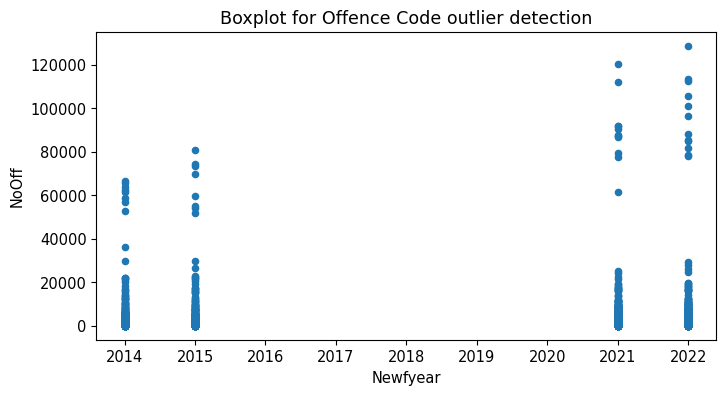

In [ ]:
Criminaldataset.plot(kind='scatter', y='NoOff', x='Newfyear', title='Boxplot for Offence Code outlier detection');

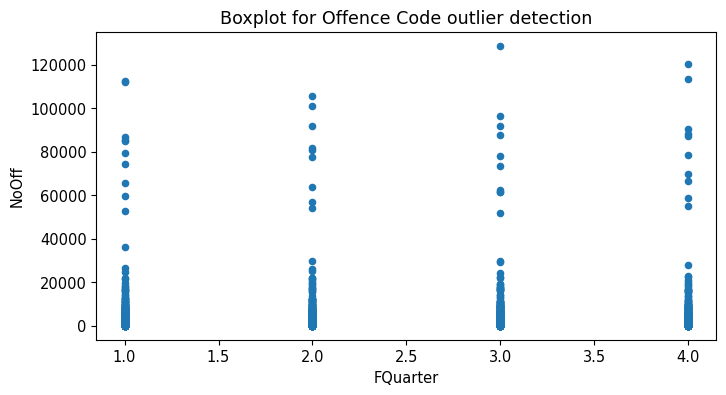

In [ ]:
Criminaldataset.plot(kind='scatter', y='NoOff', x='FQuarter', title='Boxplot for Offence Code outlier detection');

## Handle Outliers

In [ ]:
 def handle_outliers(dataframe, column):
    z_scores = stats.zscore(dataframe[column])
    abs_z_scores = abs(z_scores)
    threshold = 3  # Adjust the threshold based on your requirement
    outliers = (abs_z_scores > threshold)
    dataframe[column][outliers] = dataframe[column].median()  # Replace outliers with the median

# Apply the function to handle outliers for the 'NoOff' column
handle_outliers(Criminaldataset, 'NoOff')

# Display the modified dataframe
Criminaldataset

<ipython-input-109-dd5ca491a8aa>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[column][outliers] = dataframe[column].median()  # Replace outliers with the median


,Newfyear,FQuarter,ForceName,OffDesc,OffGroup,OffSubgroup,OffCode,NoOff,newOffGroup,noSGroup
0,2021,1,Kent,Sexual assault on a male aged 13 and over,Sexual offences,Other sexual offences,17A,81,Sexual offences,Other sexual offences
1,2021,1,Lancashire,Sexual assault on a male aged 13 and over,Sexual offences,Other sexual offences,17A,38,Sexual offences,Other sexual offences
2,2021,1,Leicestershire,Sexual assault on a male aged 13 and over,Sexual offences,Other sexual offences,17A,27,Sexual offences,Other sexual offences
3,2021,1,Lincolnshire,Sexual assault on a male aged 13 and over,Sexual offences,Other sexual offences,17A,11,Sexual offences,Other sexual offences
4,2021,1,"London, City of",Sexual assault on a male aged 13 and over,Sexual offences,Other sexual offences,17A,1,Sexual offences,Other sexual offences
...,...,...,...,...,...,...,...,...,...,...
89979,2021,1,Hertfordshire,Burglary Business and Community,Theft offences,Non-domestic burglary,30C,228,Unknown,Unknown
89980,2021,1,Hertfordshire,Violent disorder,Public order offences,Public order offences,62A,0,Public order offences,Public order offences
89981,2021,1,Humberside,Burglary Business and Community,Theft offences,Non-domestic burglary,30C,212,Unknown,Unknown
89982,2021,1,Humberside,Violent disorder,Public order offences,Public order offences,62A,0,Public order offences,Public order offences


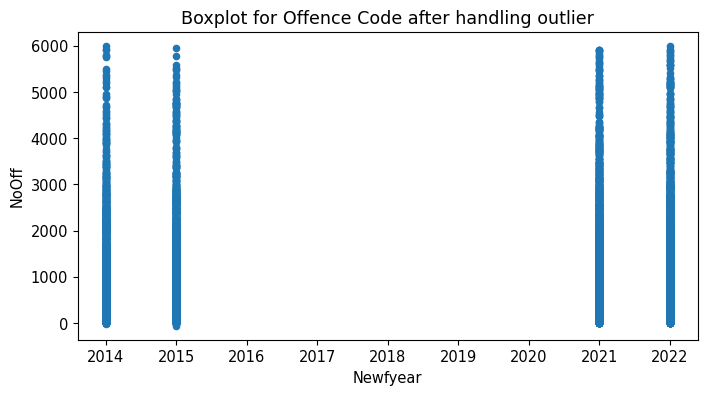

In [ ]:
Criminaldataset.plot(kind='scatter', y='NoOff', x='Newfyear', title='Boxplot for Offence Code after handling outlier');

# Correlations

In [ ]:
Criminaldataset.corr()

<ipython-input-111-eb76f73ed732>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Criminaldataset.corr()


,Newfyear,FQuarter,NoOff
Newfyear,1.000000e+00,-7.198652e-14,0.034814
FQuarter,-7.198652e-14,1.000000e+00,-0.001130
NoOff,3.481397e-02,-1.130271e-03,1.000000


In [ ]:
# Assuming Criminaldataset is a PySpark DataFrame
correlation_matrix = Criminaldataset.corr()

<ipython-input-112-96f5902eb658>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = Criminaldataset.corr()


<ipython-input-113-88bbf5737b02>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Criminaldataset.corr(), annot=True)


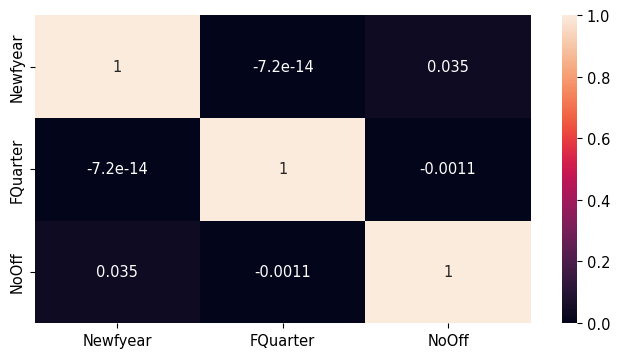

In [ ]:
# Heatmap
sns.heatmap(Criminaldataset.corr(), annot=True)
plt.show()

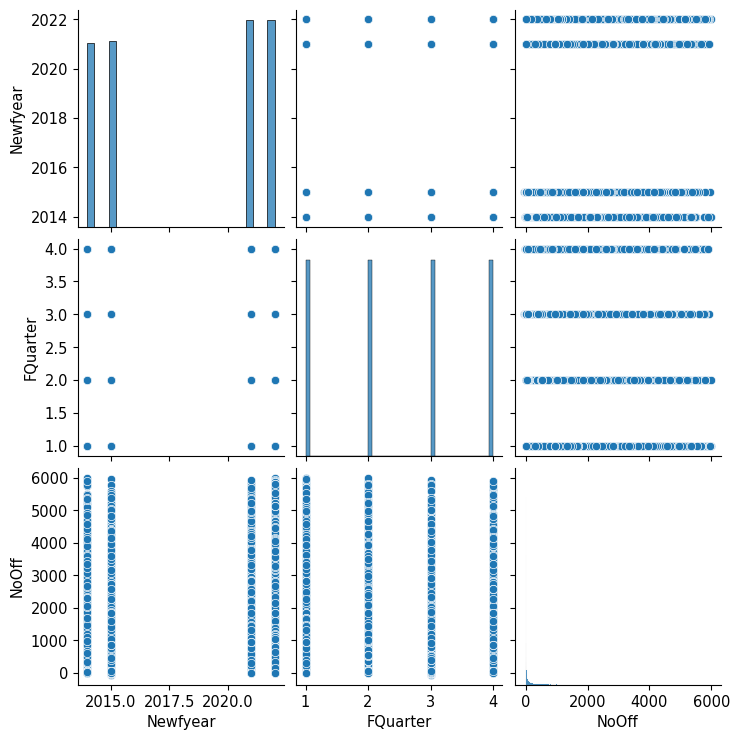

In [ ]:
sns.pairplot(Criminaldataset)
plt.show()

## Saving data

In [ ]:
path= 'newdata_dummy.csv'
Criminaldataset.to_csv(path)

# Map Reducde

In [ ]:
from functools import reduce


# Map: Create a dictionary with ForceName as the key and NoOff as the value
mapped_data = map(lambda x: {x[0]: x[1]}, \
                  zip(Criminaldataset['ForceName'], \
                      Criminaldataset['NoOff']))

# Reduce: Sum the NoOff values for each ForceName
reduced_data = reduce(lambda x,
                      y: {k: x.get(k, 0) + y.get(k, 0) \
                      for k in set(x) | set(y)}, mapped_data)

reduced_data

{'Derbyshire': 276484,
 'Dorset': 180523,
 'South Yorkshire': 504469,
 'Northamptonshire': 220651,
 'Warwickshire': 140836,
 'West Midlands': 890863,
 'Cambridgeshire': 234114,
 'Gwent': 187229,
 'North Yorkshire': 169231,
 'British Transport Police': 206550,
 'Cleveland': 247767,
 'Hampshire': 579064,
 'Financial Fraud Action UK': 88,
 'North Wales': 204884,
 'Wiltshire': 156140,
 'Norfolk': 228456,
 'Dyfed-Powys': 127590,
 'CIFAS': 88,
 'Bedfordshire': 182072,
 'Hertfordshire': 271148,
 'West Yorkshire': 776006,
 'Avon and Somerset': 499802,
 'Staffordshire': 297783,
 'Essex': 504294,
 'Devon and Cornwall': 363215,
 'Kent': 518461,
 'Thames Valley': 582801,
 'Sussex': 434849,
 'Cumbria': 126865,
 'Lincolnshire': 184303,
 'Surrey': 254904,
 'Metropolitan Police': 1040598,
 'Leicestershire': 326412,
 'London, City of': 24449,
 'Nottinghamshire': 349435,
 'Durham': 192458,
 'Greater Manchester': 911731,
 'Cifas': 88,
 'Action Fraud': 176,
 'Humberside': 328599,
 'Lancashire': 459226,
 '

# Machine Learning: Research Question 3: Predict no of offences

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

In [ ]:
Criminaldataset.head(5)

,Newfyear,FQuarter,ForceName,OffDesc,OffGroup,OffSubgroup,OffCode,NoOff,newOffGroup,noSGroup
0,2021,1,Kent,Sexual assault on a male aged 13 and over,Sexual offences,Other sexual offences,17A,81,Sexual offences,Other sexual offences
1,2021,1,Lancashire,Sexual assault on a male aged 13 and over,Sexual offences,Other sexual offences,17A,38,Sexual offences,Other sexual offences
2,2021,1,Leicestershire,Sexual assault on a male aged 13 and over,Sexual offences,Other sexual offences,17A,27,Sexual offences,Other sexual offences
3,2021,1,Lincolnshire,Sexual assault on a male aged 13 and over,Sexual offences,Other sexual offences,17A,11,Sexual offences,Other sexual offences
4,2021,1,"London, City of",Sexual assault on a male aged 13 and over,Sexual offences,Other sexual offences,17A,1,Sexual offences,Other sexual offences


## Extract the columns needed

In [ ]:
Criminaldataset = Criminaldataset.loc[:,['Newfyear', 'FQuarter', 'ForceName', 'OffCode', 'NoOff']]

## Encode the columns

In [ ]:
# Label encode categorical features
label_encoder = LabelEncoder()
categorical_columns = ['ForceName', 'OffCode']
for column in categorical_columns:
    Criminaldataset[column] = label_encoder.fit_transform(Criminaldataset[column])
    #[column] = label_encoder.transform(test_data[column])

Criminaldataset.head(5)

,Newfyear,FQuarter,ForceName,OffCode,NoOff
0,2021,1,23,14,81
1,2021,1,24,14,38
2,2021,1,25,14,27
3,2021,1,26,14,11
4,2021,1,27,14,1


## Splitting dataset

In [ ]:
# Split the dataset into train and test sets (70/30)
train_data, test_data = train_test_split(Criminaldataset, test_size=0.3, random_state=42)

## Seperate feature from Target

In [ ]:
x = ['Newfyear', 'FQuarter', 'ForceName', 'OffCode'] #feature
y = ['NoOff'] #target

## Highlight train and test data for x and y

In [ ]:
X_train = train_data[x]
X_test = test_data[x]
y_train = train_data[y]
y_test = test_data[y]

## Initiate Regression Models to use

In [ ]:
# Initialize regression models
linear_reg = LinearRegression()
decision_tree_reg = DecisionTreeRegressor()
random_forest_reg = RandomForestRegressor()

### Linear Regression

In [ ]:
# Fit the models on the training data
linear_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions on the test set
y_pred_linear = linear_reg.predict(X_test)
y_pred_linear

array([[126.12620624],
       [ 99.57067575],
       [ 30.23535421],
       ...,
       [281.43699553],
       [175.7982275 ],
       [218.19074205]])

### Decision Tree

In [ ]:
#fit the model on the training data
decision_tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
#make predictions on the test data
y_pred_tree = decision_tree_reg.predict(X_test)
y_pred_tree

array([39.,  4.,  0., ...,  6.,  1., 33.])

### Random Forest

In [ ]:
#fit the model on the training dataset
random_forest_reg.fit(X_train, y_train)

<ipython-input-129-11a09ce52c08>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_reg.fit(X_train, y_train)


RandomForestRegressor()

In [ ]:
#make predictions on the test data
y_pred_forest = random_forest_reg.predict(X_test)
y_pred_forest

array([43.32,  3.19,  1.68, ...,  8.93,  1.69, 35.06])

## Calculate the Mean Square Error

In [ ]:
# Calculate mean squared errors
lr = mean_squared_error(y_test, y_pred_linear)
mse_linear = lr
tr = mean_squared_error(y_test, y_pred_tree)
mse_tree = tr
fr =mean_squared_error(y_test, y_pred_forest)
mse_forest = fr
# Display mean squared errors
print("Mean Squared Error (Linear Regression):", mse_linear)
print("Mean Squared Error (Decision Tree):", mse_tree)
print("Mean Squared Error (Random Forest):", mse_forest)

Mean Squared Error (Linear Regression): 242583.03033183207
Mean Squared Error (Decision Tree): 25923.18650911246
Mean Squared Error (Random Forest): 13738.419628089347


## Plot the graph

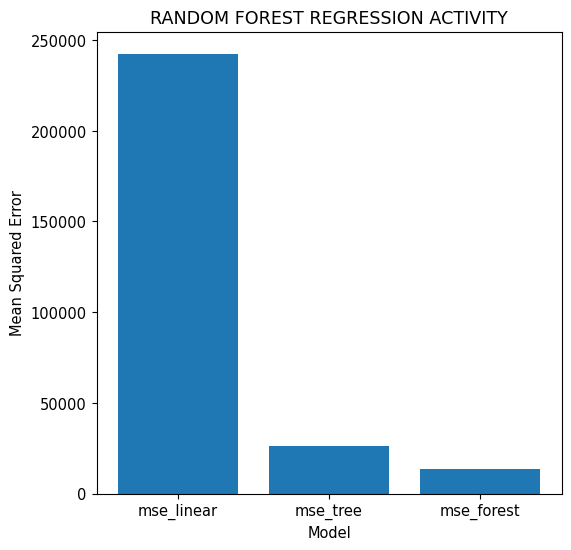

In [ ]:
from re import X
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))

x_axis = ['mse_linear', 'mse_tree', 'mse_forest']
y_axis = [lr, tr, fr, ]

plt.bar(x_axis, y_axis)
plt.title('RANDOM FOREST REGRESSION ACTIVITY')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.show()

In [ ]:
# Determine the model with the least error
min_error_model = min(mse_linear, mse_tree, mse_forest)

if min_error_model == mse_linear:
    print("Linear Regression has the least error.")
elif min_error_model == mse_tree:
    print("Decision Tree has the least error.")
else:
    print("Random Forest has the least error.")

Random Forest has the least error.


# Visualization

We use Power Bi and Tabluea